In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc3 as pm


from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-darkgrid')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "True",
              "progress": "False",
              "shortcut": "False"});

##### <center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Intro to Probabilistic programming</h1>
<h2 align="center">Automating inference, not modeling</h2> 
    


<br>
<br>
<br>
<br>
<br>

## Aims

* Learn to build simple models with PyMC3 and ArviZ
* Learn about posterior predictive distribution
* Compare groups in terms of effect size (as opposite to "statistical significance")

# Probabilistic programming


* Although conceptually simple, fully probabilistic models often lead to analytically intractable expressions

* The _promise of probabilistic programming_  is clear separation of modeling and inference. Practitioners should focus on modeling, not _computational/mathematical details_

* Models are written in code and then _compiled_ to get the posterior

* _Universal inference engines_ can solve any probabilistic model (over-statement!)

## PyMC3: Probabilistic programming with Python
<br>

<center><img src="img/PyMC3_banner.svg" width=300></center>

* Model building
    * A large collections of probability distributions
    * A clear and powerful syntax
    * Integration with the PyData-stack


* Inference
    * Markov Chain Monte Carlo (NUTS, MH)
    * Sequential Monte Carlo (SMC, SMC-ABC)
    * Variational Inference


* Computational backend:
    * Theano --> Speed, automatic differenciation, mathematical optimizations, GPU Support
    * PyMC4 --> [Tensorflow Probability](https://medium.com/@pymc_devs/theano-tensorflow-and-the-future-of-pymc-6c9987bb19d5)

In [5]:
np.random.seed(123)
n_experimentos = 4
theta_real = .35  # en una situación real este valor es desconocido
datos = stats.bernoulli.rvs(theta_real, size=n_experimentos)
datos

array([1, 0, 0, 0])

In [6]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1, beta=1)  # a priori
    y = pm.Bernoulli('y', p=θ, observed=datos)  # likelihood
    trace = pm.sample(1000)  # Universal Inferece engine! 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:00<00:00, 3325.64draws/s]


## ArviZ: Exploratory analysis of Bayesian models

<br>
<br>
<center><img src="img/logo_arviz.png" width=400></center>
<br>


* Diagnoses of the quality of the inference
* Model criticism, including evaluations of both model assumptions and model predictions
* Comparison of models, including model selection or model averaging
* Preparation of the results for a particular audience

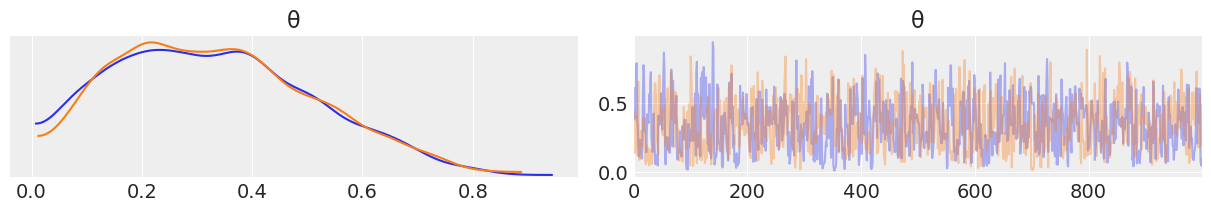

In [7]:
az.plot_trace(trace);

In [8]:
az.summary(trace)

,mean,sd,mcse_mean,mcse_sd,hpd_3%,hpd_97%,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.337,0.18,0.006,0.004,0.043,0.672,828.0,828.0,771.0,804.0,1.0


## The German tank problem

<br>

* During Second World War II the allies collected serial numbers from captured tanks


* How to estimate the number of total German tanks from this information? 


In [9]:
serial_numbers = np.array([15, 20, 28])
with pm.Model() as model:
    N = pm.DiscreteUniform('N', lower=serial_numbers.max(), upper=y.max()*10)
    #N = pm.Deterministic('N', pm.Exponential('N_', 1/10) + serial_numbers.max())
    y_obs = pm.DiscreteUniform('y_obs', lower=0, upper=N, observed=serial_numbers)

    trace = pm.sample(2000)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:00<00:00, 9383.08draws/s] 


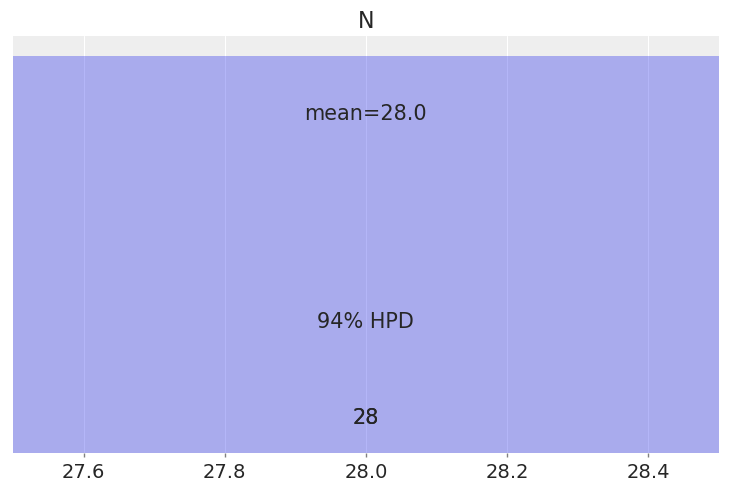

In [10]:
az.plot_posterior(trace, var_names='~N_');

## Gaussian-model or inferring the speed of light

At the end of the 19th century Simon Newcomb conducted several experiments to determine the speed of light. In one of them, Newcomb measured the time it took for the light to travel 7,442 meters.

In [11]:
datos = np.array([24.828, 24.826, 24.833, 24.824, 24.834, 24.756, 24.827, 24.816,
                  24.84 , 24.798, 24.829, 24.822, 24.824, 24.821, 24.825, 24.83 ,
                  24.823, 24.829, 24.831, 24.819, 24.824, 24.82 , 24.836, 24.832,
                  24.836, 24.828, 24.825, 24.821, 24.828, 24.829, 24.837, 24.825,
                  24.828, 24.826, 24.83 , 24.832, 24.836, 24.826, 24.83 , 24.822,
                  24.836, 24.823, 24.827, 24.827, 24.828, 24.827, 24.831, 24.827,
                  24.826, 24.833, 24.826, 24.832, 24.832, 24.824, 24.839, 24.828,
                  24.824, 24.825, 24.832, 24.825, 24.829, 24.827, 24.828, 24.829,
                  24.816, 24.823])

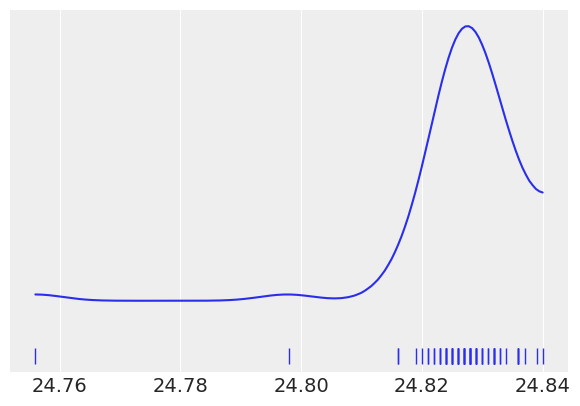

In [12]:
az.plot_kde(datos, rug=True)
plt.yticks([]);




\begin{align} 
\mu &\sim U(l, h) \\
\sigma &\sim \text{Half-Normal}(\sigma_{\sigma}) \\
y &\sim \mathcal{N}(\mu, \sigma)
\end{align}

In [13]:
with pm.Model() as modelo_g:
    # Priors
    μ = pm.Uniform('μ', 24, 25)
    #μ = pm.Normal('μ', 24, 10) # alternative prior
    σ = pm.HalfNormal('σ', sd=1)
    #σ = pm.HalfNormal('σ', sd=datos.std() * 100)
    # Likelihood
    y = pm.Normal('y', mu=μ, sd=σ, observed=datos)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1469.19draws/s]


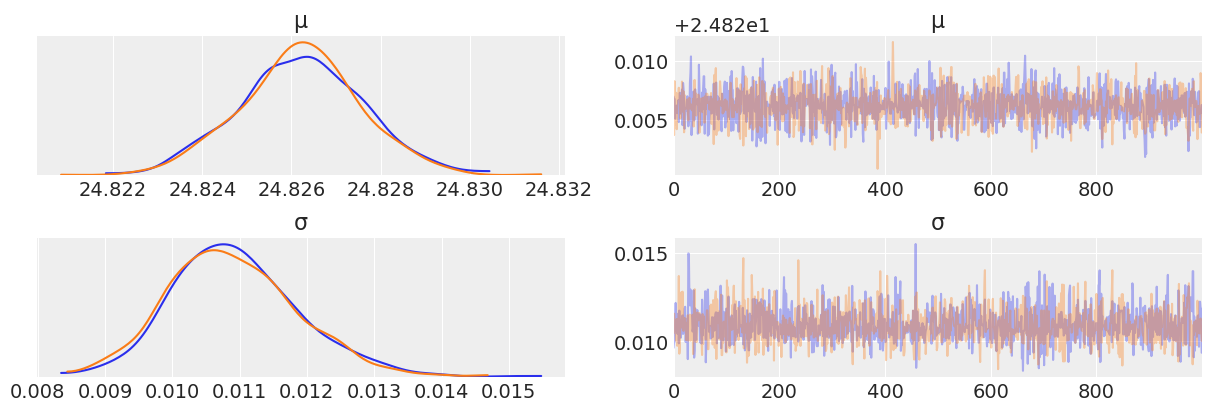

In [14]:
az.plot_trace(trace_g);

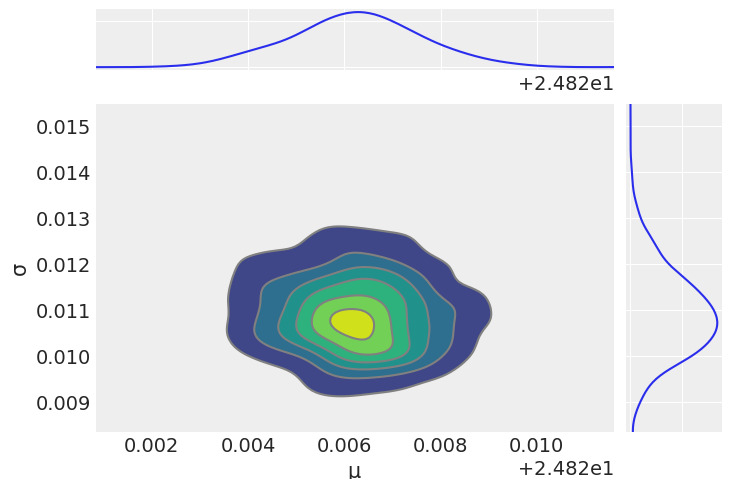

In [15]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

## The posterior as the only estimator

* The posterior representas everything we known about a problem, given a model and a dataset.

* As a general rule once we got the posterior we compute some expectation 


$$
J = \int \varphi(\theta) \ \ p(\theta \mid y) d\theta
$$

* For example, to compute the mean of $\theta$ we replace $\varphi(\theta)$ with $\theta$:

$$
\bar \theta = \int \theta \ \ p(\theta \mid y) d\theta
$$

* Notice this is a weighted average, each value of $\theta$ is _weighted_ by the _posterior_.

* In practice (as we sample from the posterior) this integrals are just sums

## Posterior predictive distribution

**Conceptually**: The distribution of _predicted data_ ($\tilde{y}$) according to the _posterior_ (i.e the logical consequence of model and observed data)


**Mathematically**
\begin{equation}
p(\tilde{y} \,|\, y) = \int p(\tilde{y} \,|\, \theta) \, p(\theta \,|\, y) \, d\theta
\end{equation}


* $y$ --> observed data
* $\theta$  --> model's parameters


**computationally**

Following the speed of light example:

1. Pick an $i$ element from PyMC3's `trace` $\theta_i = (\mu_i, \sigma_i)$
2. Generate a random value from the distribution used as _likelihood_ with parameters $\theta_i$ --> $\tilde{y_i}  \sim N(\mu_i, \sigma_i)$
3. Repeat 1 and 2 $N$ times


In [16]:
pp_samples = pm.sample_posterior_predictive(trace_g, 100, modelo_g)

100%|██████████| 100/100 [00:00<00:00, 589.31it/s]


## Posterior predictive checks

* Simulated data can be used to make predictions
* Simulated data can be used to check models predictions (criticize the model)

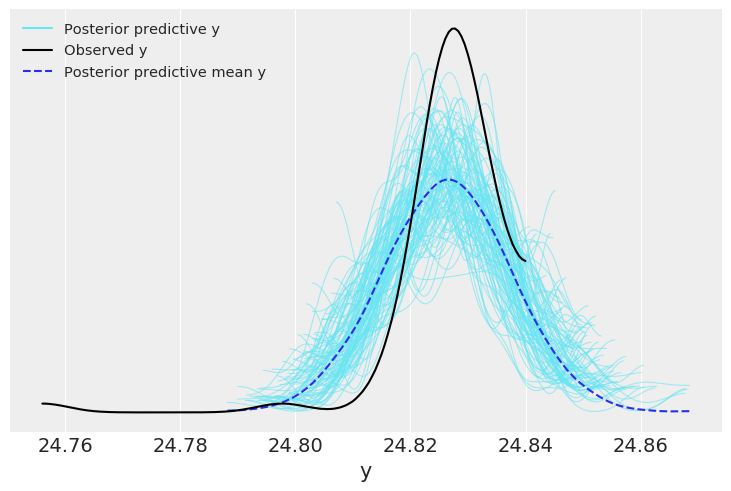

In [17]:
pp_data = az.from_pymc3(trace=trace_g, posterior_predictive=pp_samples)
az.plot_ppc(pp_data, alpha=0.6);

<center>
<img src="img/bayesian_workflow_watanabe.png" width=700>
</center>

[Mathematical Theory of Bayesian Statistics](https://www.crcpress.com/Mathematical-Foundations-of-Bayesian-Statistics/Watanabe/p/book/9781482238068)

### Coal mining disasters

<br>

* We have a record of the number of accidents in coal mines, located in the United Kingdom, that occurred between 1851 and 1962 ([Jarrett, 1979](http://biomet.oxfordjournals.org/content/66/1/191.abstract)).


* We want to study the effect of safety regulations in the decrease in the number of accidents. We are interested in finding out the year in which the rate changed also in estimating both rates.



* Some data is missing
    * Missing data $\tilde{y}$ can be automatically estimated using the posterior predictive distribution $\int p(\tilde{y} \,|\, \theta) \, p(\theta \,|\, y) \, d\theta$:

<br>
<br>

From [PyMC3 docs](https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters)

In [18]:
accidents = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                                  3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                                  2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                                  1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                                  0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                                  3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                                  0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
years = np.arange(1851, 1962)

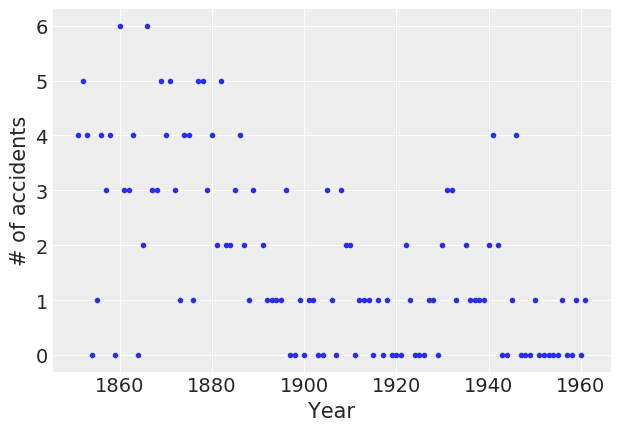

In [19]:
plt.plot(years, accidents, '.')
plt.ylabel("# of accidents")
plt.xlabel("Year");

<img src="img/modelo_mineros.png" width=350>

\begin{equation}
y \sim Poisson(rate)
\end{equation}

\begin{equation}
rate = \begin{cases}
t_0, \text{if } t \ge cp,\\
t_1, \text{if } t \lt cp
\end{cases}
\end{equation}

\begin{align}
t_0 \sim Exp(\lambda) \\
t_1 \sim Exp(\lambda) \\
cp \sim U(L, H)
\end{align}


In [20]:
with pm.Model() as model_cat:

    cp = pm.DiscreteUniform('cp', lower=years.min(), upper=years.max())
    t_0 = pm.Exponential('t_0', 1/10)
    t_1 = pm.Exponential('t_1', 1/10)
    
    rate = pm.math.switch(cp >= years, t_0, t_1)

    acc = pm.Poisson('acc', rate, observed=accidents)
    trace_cat = pm.sample(5000)

/home/osvaldo/proyectos/00_PyMC3/pymc3/pymc3/model.py:1331: UserWarning: Data in acc contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [acc_missing]
>>Metropolis: [cp]
>NUTS: [t_1, t_0]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:07<00:00, 1564.35draws/s]
The number of effective samples is smaller than 10% for some parameters.


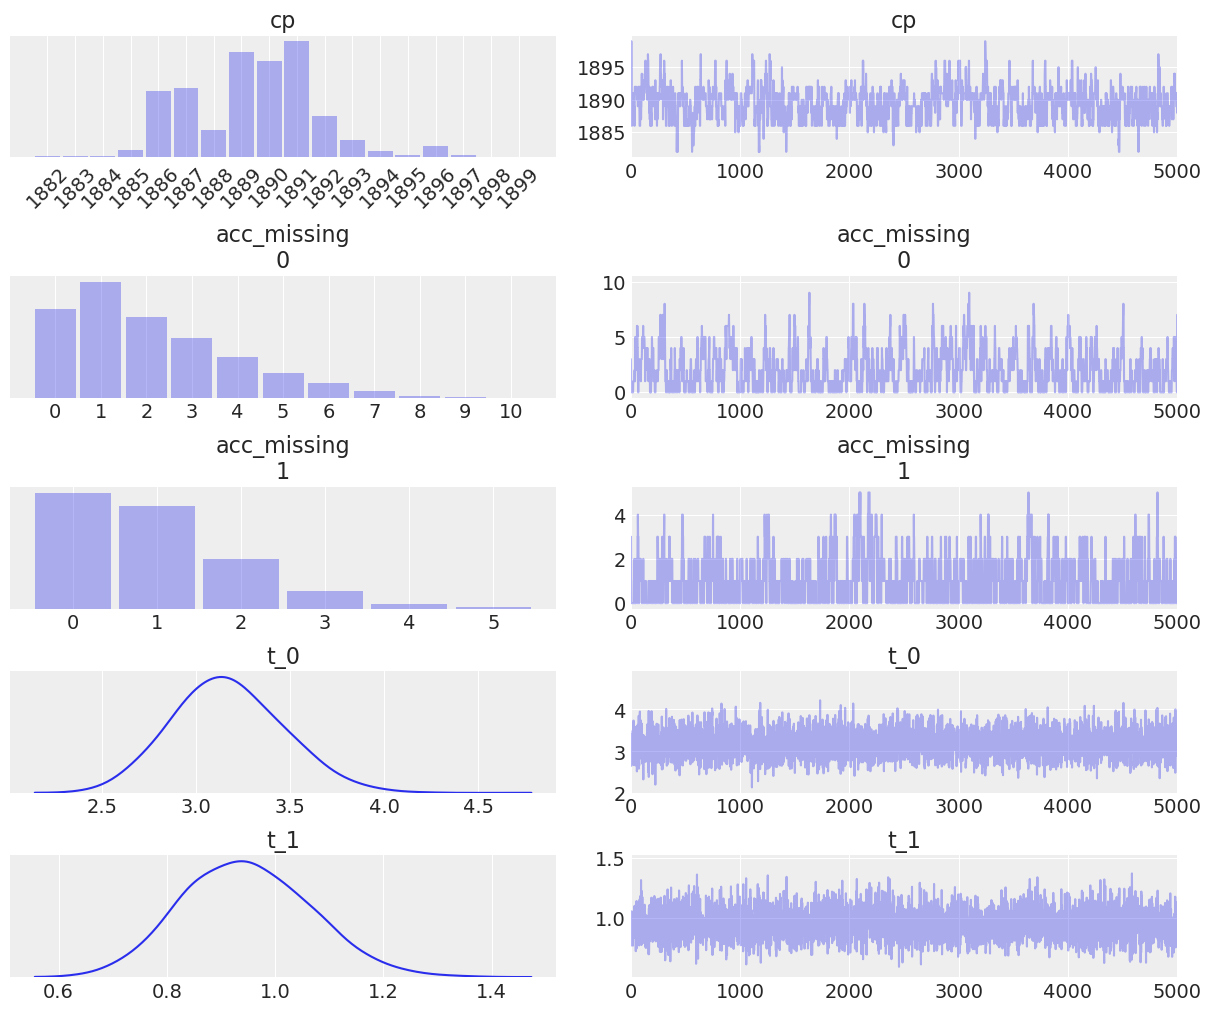

In [21]:
ax = az.plot_trace(trace_cat, combined=True);
[ticks.set_rotation(45) for ticks in ax[0, 0].get_xticklabels()];

In [22]:
pm.summary(trace_cat)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
cp,1889.430500,2.387922,0.078349,1885.000000,1893.000000,666.344735,1.000042
acc_missing__0,2.065400,1.805747,0.079328,0.000000,6.000000,378.787950,1.000008
acc_missing__1,0.958000,1.007589,0.033044,0.000000,3.000000,862.760263,1.003620
t_0,3.170622,0.293165,0.003470,2.581762,3.717837,6616.932243,1.000088
t_1,0.947831,0.118433,0.001446,0.720450,1.176565,5707.766308,1.000216


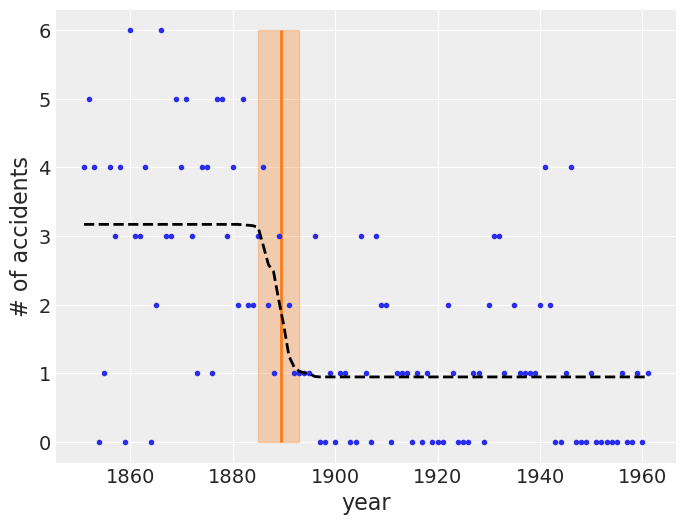

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(years, accidents, '.')
plt.ylabel("# of accidents", fontsize=16)
plt.xlabel("year", fontsize=16)

plt.vlines(trace_cat['cp'].mean(), accidents.min(), accidents.max(), color='C1', lw=2)
accidents_ave = np.zeros_like(accidents, dtype='float')
for i, year in enumerate(years):
    idx = year < trace_cat['cp']
    accidents_ave[i] = ((trace_cat['t_0'][idx].sum() + trace_cat['t_1'][~idx].sum()) 
                              / (len(trace_cat) * trace_cat.nchains))

pc_hpd = pm.hpd(trace_cat['cp'])
plt.fill_betweenx([accidents.min(), accidents.max()], pc_hpd[0], pc_hpd[1], alpha=0.3, color='C1');
plt.plot(years, accidents_ave,  'k--', lw=2);

## Group comparison

* One common statistical inference problem is the comparison of two (or more) groups
* We may be interested in whether one group is larger than another, or simply different from the other
* We require a statistical model for this because true differences are usually accompanied by measurement or stochastic noise that prevent us from drawing conclusions simply from differences calculated from the observed data.

####  The tips data-set

* We want to study how the day of the week affects the amount of tip at a given restaurant


[Bryant, P. G. and Smith, M](https://www.amazon.com/Practical-Data-Analysis-Peter-Bryant/dp/0256238715/ref=dp_ob_title_bk)

In [24]:
tips = pd.read_csv('../datos/propinas.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


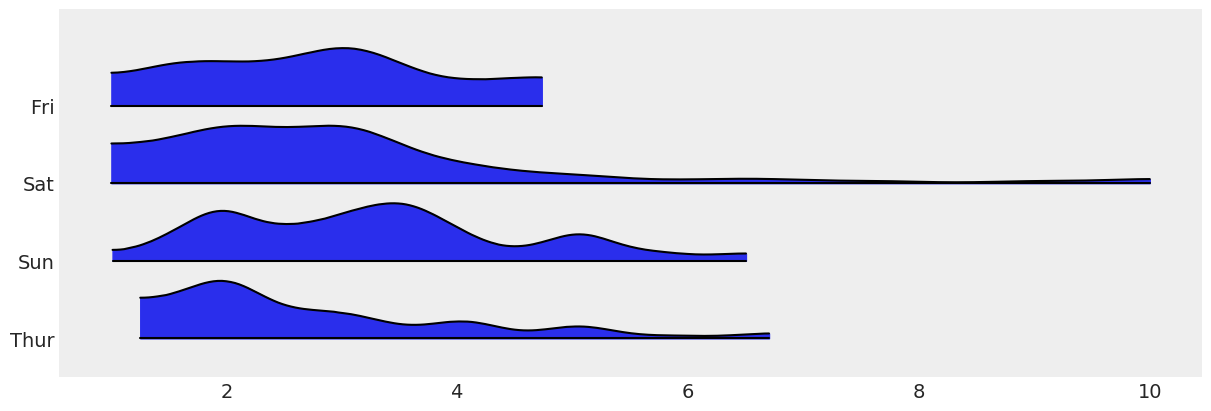

In [25]:
# Using arviz to plot data, not a posterior ¯\_(ツ)_/¯
az.plot_forest(tips.pivot(columns='day', values='tip').to_dict('list'),
               kind='ridgeplot',
               figsize=(12, 4));

In [26]:
categories = ['Thur', 'Fri', 'Sat', 'Sun']

tip = tips['tip'].values  # tips in dollars
idx = pd.Categorical(
    tips['day'],
    categories=categories).codes  # dummy variable ['Thur', 'Fri', 'Sat', 'Sun'] --> [0, 1, 2, 3]
groups = len(np.unique(idx))

In [27]:
with pm.Model() as comparing_groups:
    #  μ and σ are now vectors of shape "groups"
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)  
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)  # we use idx to properly index μ and σ

    trace_cg = pm.sample(5000)
#az.plot_trace(trace_cg);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:15<00:00, 344.18draws/s]


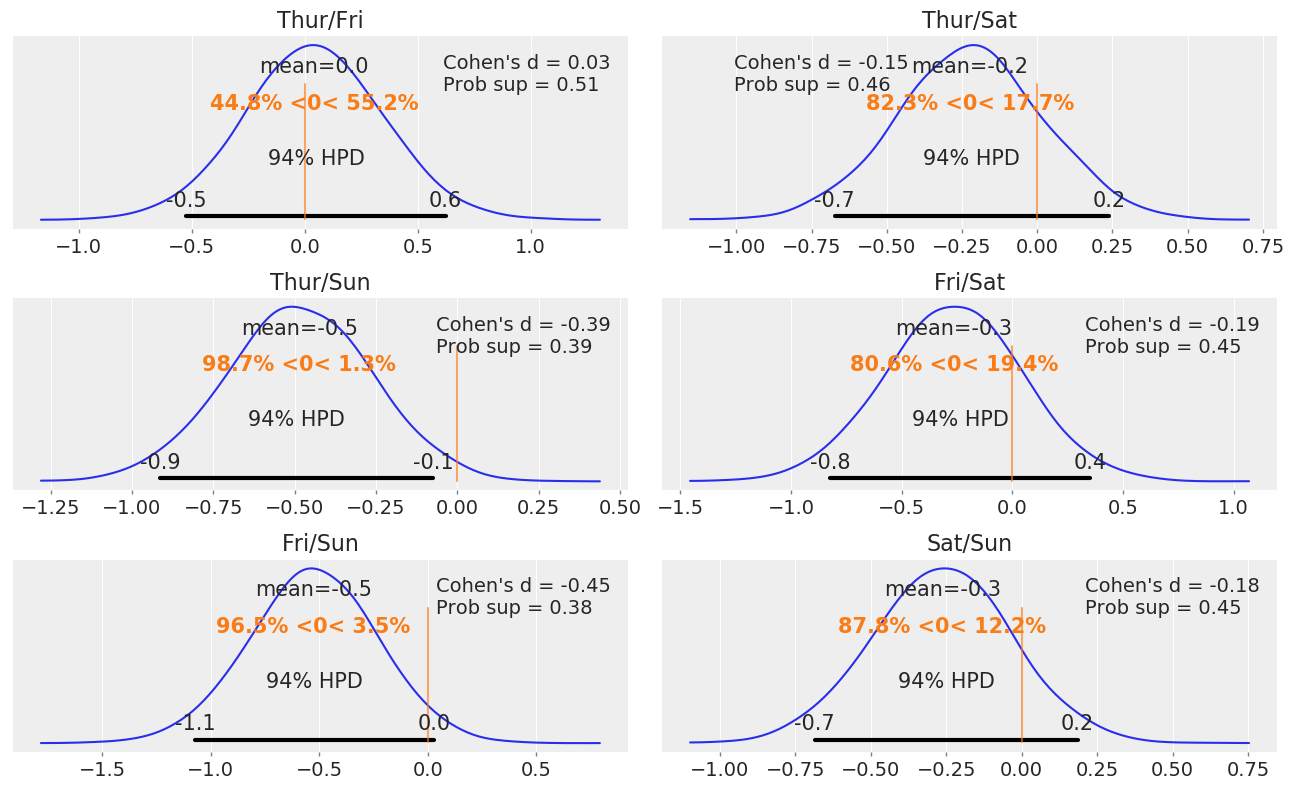

In [28]:
dist = stats.norm()

_, ax = plt.subplots(3, 2, figsize=(13, 8))

comparisons = [(i,j) for i in range(4) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i, j), (k,l) in zip(comparisons, pos):
    means_diff = trace_cg['μ'][:,i] - trace_cg['μ'][:,j]
    d_cohen = (means_diff / ((trace_cg['σ'][:,i]**2 + trace_cg['σ'][:,j]**2) / 2)**0.5).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title("%s/%s" % (categories[i], categories[j]))
    ax[k, l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps), alpha=0)
    ax[k,l ].legend(fontsize=14)
plt.tight_layout()

### Effect size


**Cohen's d**

$$
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}}
$$


* Can be interpreted as a z-score. How many (pooled) standard deviations a mean of one group is above (or below) the mean of the other group
* Check this interactive [examples](http://rpsychologist.com/d3/cohend)

**Probability of superiority**


* The probability that a data-point from one group is larger than a data-point from the other. 
* If we assume the data is normally distributed then:

\begin{equation} \label{eq_ps}
ps = \Phi \left ( \frac{\delta}{\sqrt{2}} \right)
\end{equation}


$\Phi$ is the cdf of the normal distribution and $\delta$ is Cohen's d.

## Exercises


1. Use PyMC3 to reproduce the beta-binomial example from the previous notebook (use the 3 priors).


2. Replace the beta distribution with a uniform one in the interval [0,1]. How similar are the results compared with the prior $beta(\alpha=1, \beta=1)$? What about using a larger interval such as [-1, 2]?

3. In the following definition of a probabilistic model, identify the prior and the the likelihood and the posterior:

$$y_i \sim Normal(\mu, \sigma)$$
$$\mu \sim Normal(0, 10)$$
$$\sigma \sim HalfNormal(25)$$

4. In the previous model, how many dimensions will the posterior have? Compare it with the model for the coin-flipping problem.

3. Modify `model_g`, change the prior for the mean to a Gaussian distribution centered at the empirical mean, and try a couple of reasonable values for the standard deviation of this prior. How robust/sensitive are the inferences to these changes? What do you think about using a Gaussian, which is an unbounded distribution
(goes from $-\infty$ to $\infty$), to model bounded data such as this?

4. Refit the _speed of light data_, but this time change the likelihood of `model_g` to a Student's t-distribution. This distribution has 3 parameters "mu", "sigma" and "nu", try using and exponential distribution with mean 30 as a prior for "nu". Compare the estimated values for mu and sigma using `model_g` and this model with the Student's t-distribution. What do you observe?

5. Discuss with your classmates the results of the tips example

6. What does the PyMC3 function `pm.model_to_graphviz` do?